# Tugas 2 Praktikum Metode Numerik 

Faza Muthmainnah - NPM 2006523672 - Kelas Metnum (B)

### Nomor 1 

list of x points : [2,3,4,5,6,8,9]
list of y points : [4,9,16,25,36,64,81]
Input x value to be approximated: 7
Choose your preferred method (1 = Lagrange, 2 = NDD): 2
Forward = 1, Backward = 2 :1
NDD Polynomial : 1.0*x**2
for x=7, using Forward NDD, y is approximately 49.00000
Wanna print the DD Table? (Yes = 1, No = 2): 1
|   x |   y |   DD1 |   DD2 |   DD3 |   DD4 |   DD5 |   DD6 |
|-----|-----|-------|-------|-------|-------|-------|-------|
|   2 |   4 |     5 |     1 |     0 |     0 |     0 |     0 |
|   3 |   9 |     7 |     1 |     0 |     0 |     0 |       |
|   4 |  16 |     9 |     1 |     0 |     0 |       |       |
|   5 |  25 |    11 |     1 |     0 |       |       |       |
|   6 |  36 |    14 |     1 |       |       |       |       |
|   8 |  64 |    17 |       |       |       |       |       |
|   9 |  81 |       |       |       |       |       |       |
None
Show (1 = tabel, 2 = plot) :1
|   x |   f(x) |
|-----|--------|
|   2 |      4 |
|   3 |      9 |
|   4 |     16

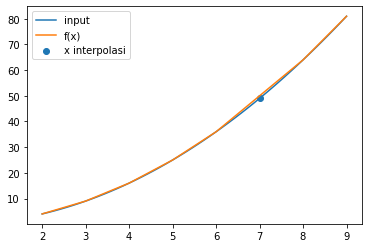

Try Again? (Yes = 1, No = 2):2


In [1]:
import sympy                      #untuk meng-import package sympy
import matplotlib.pyplot as plt   #untuk meng-import matplotlib sebagai plt
import numpy as np                #untuk meng-import numpy sebagai np
from tabulate import tabulate     #import tabulate untuk membuat tabel
from sympy import simplify        #dari package sympy import simplify

input_x = eval(input('list of x points : '))               #untuk memasukkan titik x
input_y = eval(input('list of y points : '))               #untuk memasukkan titik y
titik_x = np.array(input_x)                                #dari titik x yang telah dimasukkan buat menjadi array
titik_y= np.array(input_y)                                 #dari titik y yang telah dimasukkan buat menjadi array
eval_x = eval(input('Input x value to be approximated: ')) #untuk memasukkan nilai x yang akan diaproksimasikan

loop = 1 #untuk menjalankan looping
while loop == 1: #jika fungsi loop bernilai 1, maka program akan berjalan
    
    #membuat opsi untuk metode yang akan digunakkan
    opsi = int(input('Choose your preferred method (1 = Lagrange, 2 = NDD): '))
    
    if opsi == 1: #jika memilih opsi 1, program yang berjalan adalah metode lagrange
        #mendefinisikan formula untuk metode lagrange untuk membuat tabel 
        def formula_lagrange(x_points, y_points): 
            x=sympy.symbols('x')
            if  len(x_points)!= len(y_points):
                return 1
            pol=0
            for k in range(len(x_points)):
                L=1
                for j in range(len(x_points)):
                    if j != k:
                        L=L*((x-x_points[j]) /(x_points[k]-x_points[j]))
                pol+= L*y_points[k]
            return pol
        #mendefinisikan formula untuk metode lagrange untuk hasil interpolasi
        def LagrangePol(x,x_points,y_points):
            pol = 0 #untuk inisiasi nilai polinom diset menjadi
            n = len(x_points) #n adalah banyak titik
            for k in range(n): #untuk inisiasi nilai L(n,R) diset menjadi 1
                L = 1
                for i in range(n):
                    if i!=k:
                        L*=((x-x_points[i])/(x_points[k]-x_points[i]))#menghitung nilaiL(n,k)
                pol += y_points[k]*L #menghitung nilai aproksimasi dengan polinom
            return pol
        #untuk mem-print hasil aproksimasi menggunakan metode Lagrange
        jawaban = formula_lagrange(titik_x,titik_y)
        fungsi = str(simplify(jawaban))
        print('Lagrange Polynomial : ',fungsi)
        y_aproks = LagrangePol(eval_x,titik_x,titik_y)
        print('for x={0}, using Lagrange, y is approximately {1:.5f}' .format(eval_x,y_aproks))
   
    if opsi == 2: #jika memilih opsi 2, program yang berjalan adalah metode Newton Divided Difference
        #mendefinisikan formula untuk Newton Divided Difference
        def DDTableGenerator(x_points,y_points):
            DDTable = [y_points]
            for column in range(1,len(y_points)):
                DDcolumn = [] 
                for row in range(len(DDTable[-1])-1): 
                    DD = (DDTable[-1][row+1]-DDTable[-1][row])/(x_points[column+row]-x_points[row])
                    DDcolumn.append(DD)
                DDTable.append(DDcolumn) 
            return DDTable
        
        #membuat opsi backward atau forward untuk metode NDD
        NDD = int(input('Forward = 1, Backward = 2 :')) 
        if NDD == 1: #jika memilih 1, program yang akan berjalan adalah Forward NDD
            #mendefinisikan formula untuk Forward Newton Divided Difference
            def ForwardDD(x,x_points,y_points):
                DDTable = DDTableGenerator(x_points,y_points)
                pol = DDTable[0][0]
                mult_term = 1
                for k in range(1,len(DDTable)):
                    mult_term*=(x-x_points[k-1])
                    pol+=DDTable[k][0]*mult_term
                return pol
            #mendefinisikan formula untuk Forward Newton Divided Difference untuk membuat tabel
            def formula_forward(x_points, y_points):
                x = sympy.symbols('x')
                DDTable = DDTableGenerator(x_points, y_points)
                pol = DDTable[0][0]
                mult_term = 1
                for k in range(1, len(DDTable)):
                    mult_term = mult_term*(x-x_points[k-1])
                    pol = pol+DDTable[k][0]*mult_term
                return pol
            #untuk print hasil aproksimasi menggunakan metode Forward Newton Divided Difference
            jawaban = formula_forward(titik_x,titik_y)
            fungsi = str(simplify(jawaban))
            print('NDD Polynomial :',fungsi)
            y_aproks = ForwardDD(eval_x,titik_x,titik_y)
            print('for x={0}, using Forward NDD, y is approximately {1:.5f}' .format(eval_x,y_aproks))
            
        elif NDD == 2: #jika memilih 2, program yang akan berjalan adalah Backward NDD
            #mendefinisikan formula untuk Backward Newton Divided Difference
            def BackwardDD(x,x_points,y_points):
                DDTable = DDTableGenerator(x_points,y_points)
                pol = DDTable[0][-1]
                mult_term = 1
                for k in range(1,len(DDTable)):
                    mult_term*=(x-x_points[-k])
                    pol+=DDTable[k][-1]*mult_term
                return pol
            #mendefinisikan formula untuk Backward Newton Divided Difference untuk membuat tabel
            def formula_backward(x_points, y_points):
                DDTable = DDTableGenerator(x_points, y_points)
                x = sympy.symbols('x')
                pol = DDTable[0][-1]
                mult_term = 1
                for k in range(1, len(DDTable)):
                    mult_term = mult_term*(x-x_points[-k])
                    pol = pol+DDTable[k][-1]*mult_term
                return pol
            #untuk print hasil aproksimasi menggunakan metode Backward Newton Divided Difference
            jawaban = formula_backward(titik_x,titik_y)
            fungsi = str(simplify(jawaban))
            print('NDD Polynomial :',fungsi)
            y_aproks = BackwardDD(eval_x,titik_x,titik_y)
            print('for x={0}, using Backward NDD, y is approximately {1:.5f}' .format(eval_x,y_aproks))
            
        #membuat opsi tabel untuk ditunjukkan pada metode NDD atau tidak
        opsi_tabel = int(input('Wanna print the DD Table? (Yes = 1, No = 2): '))
        #mendefinisikan formula untuk membuat DD tabel 
        def DDTabelmaker(DDTable, x_points):
            tabel = []
            for i in range(len(DDTable)):
                list_tabel = []
                for j in range(len(DDTable[i])):
                    list_tabel.append(DDTable[j][i])
                tabel.append(list_tabel)
            for x in range(len(tabel)):
                tabel[x].insert(0, x_points[x])
            headers=["x", "y","DD1", "DD2", "DD3", "DD4", "DD5", "DD6"]
            return print(tabulate(tabel, headers, tablefmt='github'))
        #jika memilih 1, tabel akan ditunjukkan
        if opsi_tabel == 1 : 
            display_tabel = DDTabelmaker(DDTableGenerator(titik_x,titik_y),titik_x)
            print(display_tabel)
        #jika memilih 2, tabel tidak akan ditunjukkan
        elif opsi_tabel == 2: 
            None
    
    #membuat pilihan apakah ingin menunjukkan tabel atau grafik plot
    pilihan = int(input('Show (1 = tabel, 2 = plot) :'))
    if pilihan == 1: #jika memilih pilihan 1, maka akan ditunjukkan tabel
        x = np.append(titik_x,eval_x)
        y = np.append(titik_y,y_aproks)
        x_kolom = np.sort(x)
        y_kolom = np.sort(y)
        print(tabulate({"x":x_kolom,"f(x)":y_kolom},headers='keys',tablefmt='github'))
    if pilihan == 2: #jika memilih pilihan 2, maka akan ditunjukkan grafik plot
        def f(x):
            return eval(fungsi)
        x = np.linspace(titik_x[0],titik_x[-1])
        plt.plot(x,f(x))
        plt.scatter(eval_x,y_aproks)
        plt.plot(titik_x,titik_y)
        plt.legend(['input','f(x)','x interpolasi'])
        plt.show()
    
    #membuat pilihan apakah ingin mengulang program atau memberhentikan program
    repeat = int(input('Try Again? (Yes = 1, No = 2):'))
    if repeat == 1: #jika pilih 1, program kembali seperti awal
        loop = 1   #sesuai dari fungsi loop = 1
    elif repeat == 2: #jika pilih 2, program akan berhenti
        loop = 2 #karena tidak memenuhi fungsi loop = 1, maka program berhenti

**Penjelasan program Nomor 1**

Program ini merupakan program untuk menghasilkan nilai interpolasi berdasarkan titik-titik yang user gunakan dan metode interpolasi yang dipilih user.

Algoritmanya:
1. Karena ingin membuat program yang berulang, dibuat sebuah fungsi bernama 'loop' dengan nilai = 1
2. Jika nilai fungsi 'loop' = 1 semua program yang ada akan berjalan, sebaliknya jika loop ≠ 1 maka program akan berhenti
3. Pertama, definisikan semua formula terlebih dahulu dengan "def" (semua formula untuk semua metode interpolasi)
4. Selanjutnya, diberikan opsi untuk user memilih ingin menggunakan metode interpolasi yang mana
5. Jika memilih metode Lagrange, user diberi pilihan untuk memilih disajikan dalam bentuk tabel/plot grafik. Setelah itu, hasil interpolasi dan tabel/plot akan di print.
6. Jika memilih metode NDD, user akan diberi pilihan lagi untuk metode Forward atau Backward. Lalu user diberi pilihan untuk ditunjukkan tabel DD atau tidak, dan selanjutnya user memilih disajikan dalam bentuk tabel/plot. Setelah itu, hasil pilihan user seperti hasil interpolasi dan tabel/plot akan di print
7. Selanjutnya, user diberikan pilihan untuk mengulangi program atau memberhentikan program.


### Nomor 2 

In [1]:
import sympy                      #untuk meng-import package sympy
import matplotlib.pyplot as plt   #untuk meng-import matplotlib sebagai plt
import numpy as np                #untuk meng-import numpy sebagai np
from tabulate import tabulate     #import tabulate untuk membuat tabel
from sympy import simplify        #dari package sympy import simplify

input_x = eval(input('list of x points : '))               #untuk memasukkan titik x
input_y = eval(input('list of y points : '))               #untuk memasukkan titik y
titik_x = np.array(input_x)                                #dari titik x yang telah dimasukkan buat menjadi array
titik_y= np.array(input_y)                                 #dari titik y yang telah dimasukkan buat menjadi array
eval_x = eval(input('Input x value to be approximated: ')) #untuk memasukkan nilai x yang akan diaproksimasikan

loop = 1 #untuk menjalankan looping
while loop == 1: #jika fungsi loop bernilai 1, maka program akan berjalan
    
    #membuat opsi untuk metode yang akan digunakkan
    opsi = int(input('Choose your preferred method (1 = Lagrange, 2 = NDD): '))
    
    if opsi == 1: #jika memilih opsi 1, program yang berjalan adalah metode lagrange
        #mendefinisikan formula untuk metode lagrange untuk membuat tabel 
        def formula_lagrange(x_points, y_points): 
            x=sympy.symbols('x')
            if  len(x_points)!= len(y_points):
                return 1
            pol=0
            for k in range(len(x_points)):
                L=1
                for j in range(len(x_points)):
                    if j != k:
                        L=L*((x-x_points[j]) /(x_points[k]-x_points[j]))
                pol+= L*y_points[k]
            return pol
        #mendefinisikan formula untuk metode lagrange untuk hasil interpolasi
        def LagrangePol(x,x_points,y_points):
            pol = 0 #untuk inisiasi nilai polinom diset menjadi
            n = len(x_points) #n adalah banyak titik
            for k in range(n): #untuk inisiasi nilai L(n,R) diset menjadi 1
                L = 1
                for i in range(n):
                    if i!=k:
                        L*=((x-x_points[i])/(x_points[k]-x_points[i]))#menghitung nilaiL(n,k)
                pol += y_points[k]*L #menghitung nilai aproksimasi dengan polinom
            return pol
        #untuk mem-print hasil aproksimasi menggunakan metode Lagrange
        jawaban = formula_lagrange(titik_x,titik_y)
        fungsi = str(simplify(jawaban))
        print('Lagrange Polynomial : ',fungsi)
        y_aproks = LagrangePol(eval_x,titik_x,titik_y)
        print('for x={0}, using Lagrange, y is approximately {1:.5f}' .format(eval_x,y_aproks))
   
    if opsi == 2: #jika memilih opsi 2, program yang berjalan adalah metode Newton Divided Difference
        #mendefinisikan formula untuk Newton Divided Difference
        def DDTableGenerator(x_points,y_points):
            DDTable = [y_points]
            for column in range(1,len(y_points)):
                DDcolumn = [] 
                for row in range(len(DDTable[-1])-1): 
                    DD = (DDTable[-1][row+1]-DDTable[-1][row])/(x_points[column+row]-x_points[row])
                    DDcolumn.append(DD)
                DDTable.append(DDcolumn) 
            return DDTable
        
        #membuat opsi backward atau forward untuk metode NDD
        NDD = int(input('Forward = 1, Backward = 2 :')) 
        if NDD == 1: #jika memilih 1, program yang akan berjalan adalah Forward NDD
            #mendefinisikan formula untuk Forward Newton Divided Difference
            def ForwardDD(x,x_points,y_points):
                DDTable = DDTableGenerator(x_points,y_points)
                pol = DDTable[0][0]
                mult_term = 1
                for k in range(1,len(DDTable)):
                    mult_term*=(x-x_points[k-1])
                    pol+=DDTable[k][0]*mult_term
                return pol
            #mendefinisikan formula untuk Forward Newton Divided Difference untuk membuat tabel
            def formula_forward(x_points, y_points):
                x = sympy.symbols('x')
                DDTable = DDTableGenerator(x_points, y_points)
                pol = DDTable[0][0]
                mult_term = 1
                for k in range(1, len(DDTable)):
                    mult_term = mult_term*(x-x_points[k-1])
                    pol = pol+DDTable[k][0]*mult_term
                return pol
            #untuk print hasil aproksimasi menggunakan metode Forward Newton Divided Difference
            jawaban = formula_forward(titik_x,titik_y)
            fungsi = str(simplify(jawaban))
            print('NDD Polynomial :',fungsi)
            y_aproks = ForwardDD(eval_x,titik_x,titik_y)
            print('for x={0}, using Forward NDD, y is approximately {1:.5f}' .format(eval_x,y_aproks))
            
        elif NDD == 2: #jika memilih 2, program yang akan berjalan adalah Backward NDD
            #mendefinisikan formula untuk Backward Newton Divided Difference
            def BackwardDD(x,x_points,y_points):
                DDTable = DDTableGenerator(x_points,y_points)
                pol = DDTable[0][-1]
                mult_term = 1
                for k in range(1,len(DDTable)):
                    mult_term*=(x-x_points[-k])
                    pol+=DDTable[k][-1]*mult_term
                return pol
            #mendefinisikan formula untuk Backward Newton Divided Difference untuk membuat tabel
            def formula_backward(x_points, y_points):
                DDTable = DDTableGenerator(x_points, y_points)
                x = sympy.symbols('x')
                pol = DDTable[0][-1]
                mult_term = 1
                for k in range(1, len(DDTable)):
                    mult_term = mult_term*(x-x_points[-k])
                    pol = pol+DDTable[k][-1]*mult_term
                return pol
            #untuk print hasil aproksimasi menggunakan metode Backward Newton Divided Difference
            jawaban = formula_backward(titik_x,titik_y)
            fungsi = str(simplify(jawaban))
            print('NDD Polynomial :',fungsi)
            y_aproks = BackwardDD(eval_x,titik_x,titik_y)
            print('for x={0}, using Backward NDD, y is approximately {1:.5f}' .format(eval_x,y_aproks))
            
        #membuat opsi tabel untuk ditunjukkan pada metode NDD atau tidak
        opsi_tabel = int(input('Wanna print the DD Table? (Yes = 1, No = 2): '))
        #mendefinisikan formula untuk membuat DD tabel 
        def DDTabelmaker(DDTable, x_points):
            tabel = []
            for i in range(len(DDTable)):
                list_tabel = []
                for j in range(len(DDTable[i])):
                    list_tabel.append(DDTable[j][i])
                tabel.append(list_tabel)
            for x in range(len(tabel)):
                tabel[x].insert(0, x_points[x])
            headers=["x", "y","DD1", "DD2", "DD3", "DD4", "DD5", "DD6"]
            return print(tabulate(tabel, headers, tablefmt='github'))
        #jika memilih 1, tabel akan ditunjukkan
        if opsi_tabel == 1 : 
            display_tabel = DDTabelmaker(DDTableGenerator(titik_x,titik_y),titik_x)
            print(display_tabel)
        #jika memilih 2, tabel tidak akan ditunjukkan
        elif opsi_tabel == 2: 
            None
    
    #membuat pilihan apakah ingin menunjukkan tabel atau grafik plot
    pilihan = int(input('Show (1 = tabel, 2 = plot) :'))
    if pilihan == 1: #jika memilih pilihan 1, maka akan ditunjukkan tabel
        x = np.append(titik_x,eval_x)
        y = np.append(titik_y,y_aproks)
        x_kolom = np.sort(x)
        y_kolom = np.sort(y)
        print(tabulate({"x":x_kolom,"f(x)":y_kolom},headers='keys',tablefmt='github'))
    if pilihan == 2: #jika memilih pilihan 2, maka akan ditunjukkan grafik plot
        def f(x):
            return eval(fungsi)
        x = np.linspace(titik_x[0],titik_x[-1])
        plt.plot(x,f(x))
        plt.scatter(eval_x,y_aproks)
        plt.plot(titik_x,titik_y)
        plt.legend(['input','f(x)','x interpolasi'])
        plt.show()
    
    #membuat pilihan apakah ingin mengulang program atau memberhentikan program
    repeat = int(input('Try Again? (Yes = 1, No = 2):'))
    if repeat == 1: #jika pilih 1, program kembali seperti awal
        loop = 1   #sesuai dari fungsi loop = 1
    elif repeat == 2: #jika pilih 2, program akan berhenti
        loop = 2 #karena tidak memenuhi fungsi loop = 1, maka program berhenti

list of x points : [2, 2.15, 2.25, 2.3, 3.38, 4.1, 4.24, 4.5]
list of y points : [4.9, 6.4, 8.1, 14.1, 18.1, 22.1, 24.9, 29.1]
Input x value to be approximated: 3.5
Choose your preferred method (1 = Lagrange, 2 = NDD): 1
Lagrange Polynomial :  269.7993318656*x**7 - 6104.14917877837*x**6 + 58230.4977178019*x**5 - 303330.788902977*x**4 + 931166.260016076*x**3 - 1683847.75827344*x**2 + 1660836.09152256*x - 689558.401638994
for x=3.5, using Lagrange, y is approximately -18.68276
Show (1 = tabel, 2 = plot) :1
|    x |     f(x) |
|------|----------|
| 2    | -18.6828 |
| 2.15 |   4.9    |
| 2.25 |   6.4    |
| 2.3  |   8.1    |
| 3.38 |  14.1    |
| 3.5  |  18.1    |
| 4.1  |  22.1    |
| 4.24 |  24.9    |
| 4.5  |  29.1    |
Try Again? (Yes = 1, No = 2):1
Choose your preferred method (1 = Lagrange, 2 = NDD): 2
Forward = 1, Backward = 2 :1
NDD Polynomial : 269.7993318656*x**7 - 6104.14917877838*x**6 + 58230.4977178019*x**5 - 303330.788902977*x**4 + 931166.260016076*x**3 - 1683847.75827344*x*

**Penjelasan Nomor 2**
\
Diketahui : \
waktu |  2  |2.15 |2.25 |  2.3 | 3.38 | 4.1  | 4.24 | 4.5  | \
jarak | 4.9 | 6.4 | 8.1 | 14.1 | 18.1 | 22.1 | 24.9 | 29.1 | \
waktu memulai latihan : 09:15:00 \
\
Ditanya : \
nilai interpolasi jarak yang telah ia tempuh ketika waktu menunjukkan pukul 09:18:30. 
 
Jawab : \
Misalkan waktu yang diketahui merupakan titik-titik x \
Misalkan jarak yang diketahui merupakan titik-titik y \
Waktu tempuh = 09.18.30 - 09.15.00 = 3.30 \
karena waktu nya 3 menit 30 detik, maka waktunya adalah 3.5 menit \
waktu tempuh 3.5 menit tersebut merupakan titik x yang akan diaproksimasikan 

\
Berdasarkan program yang telah dibuat, didapatkan :\
Nilai aproksimasi menggunakan metode Lagrange = -18.68276 \
Nilai aproksimasi menggunakan metode Forward Newton Divided Difference = -18.68276 \
Nilai aproksimasi menggunakan metode Backward Newton Divided Difference = -18.68276 \
\
Maka, didapatkan hasil aproksimasi menggunakan 3 metode tersebut nilainya sama sehingga kesimpulannya semua metode menghasilkan nilai yang sama